/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


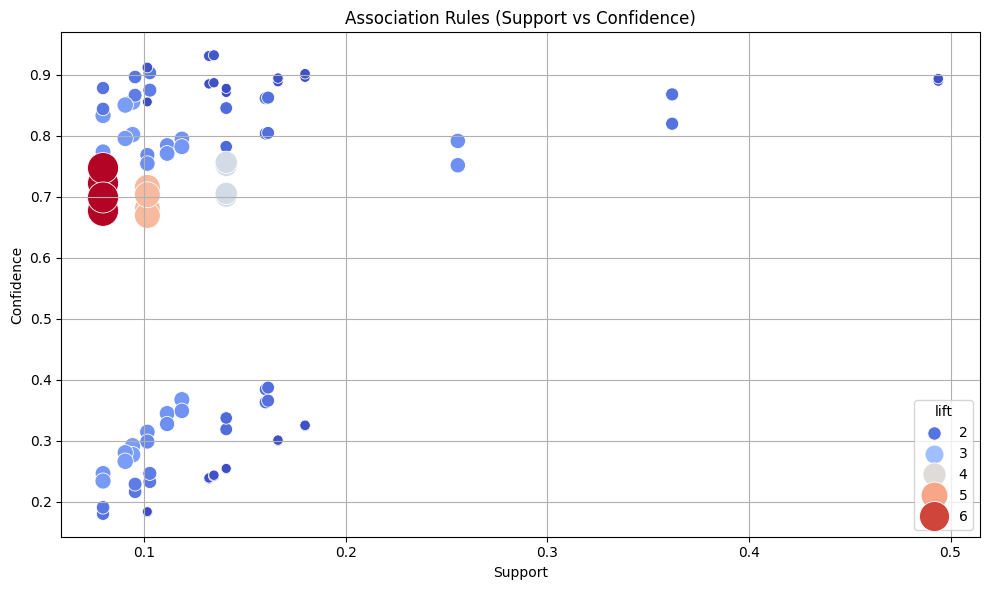

,antecedents,consequents,support,confidence,lift
60,"(라면, 버터)","(계란, 콜라)",0.079462,0.677083,6.366140
59,"(계란, 콜라)","(라면, 버터)",0.079462,0.747126,6.366140
58,"(계란, 라면)","(버터, 콜라)",0.079462,0.722222,6.352449
61,"(버터, 콜라)","(계란, 라면)",0.079462,0.698925,6.352449
71,"(우유, 버터)","(계란, 빵)",0.101467,0.669355,4.720106


In [5]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# 가상 거래 데이터 생성 (1000건)
np.random.seed(42)
items = ['우유', '빵', '버터', '계란', '콜라', '라면']
transactions = []

# 일부 상품은 함께 구매되도록 편향 설정
for tid in range(1, 1001):
    basket = []
    if np.random.rand() < 0.4:
        basket += ['우유', '빵']
    if np.random.rand() < 0.3:
        basket += ['라면', '콜라']
    if np.random.rand() < 0.2:
        basket += ['버터', '계란']
    basket += list(np.random.choice(items, size=np.random.randint(0, 2), replace=False))
    for item in set(basket):
        transactions.append({'Transaction': tid, 'Item': item})

df = pd.DataFrame(transactions)

# 거래-상품 매트릭스로 변환
basket_df = df.pivot_table(index='Transaction', columns='Item', aggfunc=lambda x: 1, fill_value=0)

# Frequent Itemsets 추출
frequent_itemsets = apriori(basket_df, min_support=0.05, use_colnames=True)

# 연관 규칙 생성
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rules, x='support', y='confidence',
    size='lift', hue='lift', sizes=(50, 500), palette='coolwarm'
)
plt.title('Association Rules (Support vs Confidence)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.tight_layout()
plt.show()

# 규칙 요약
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head()
